Lab problems 1-4

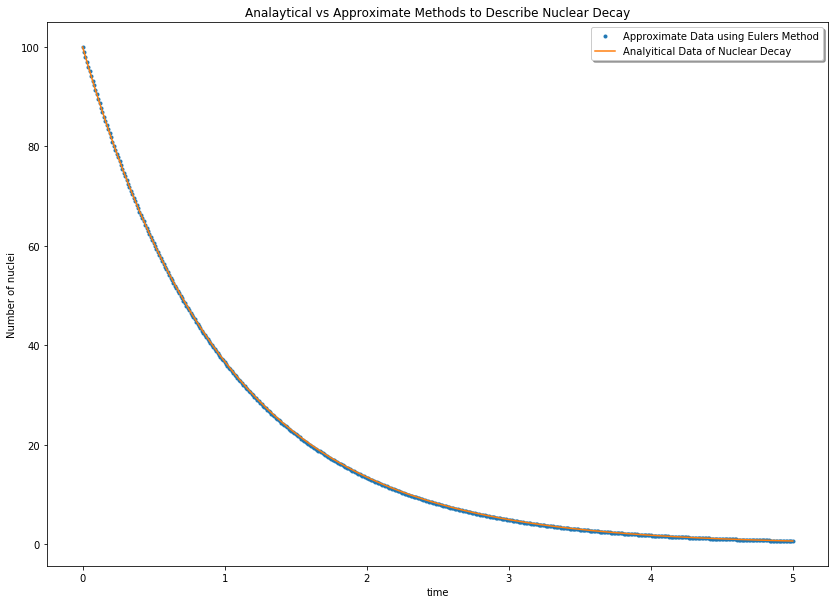

In [36]:
from math import exp
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

#predefined constants allows me to change values here instead of changing them at every instance I  use it later on
Range=500
lamda=1
initPop=100
tDelta=.01

def Nanalytical(lamda, initPop,t):
    '''Calculates the number of nuclei at a given time t.
    The arguments are lambda, inital population, andtime and returns the value of N(number of nuclei)'''
    return initPop*exp(-lamda*t)




def Napprox(lamda, initPop,tDelta ):
    '''Calculates the approximate number of nuclei using Eulers method at specific times. 
    '''
    N1=initPop
    approx=[initPop]
    for x in range(Range):
        Nnew= N1-lamda*N1*(tDelta)
        approx.append(Nnew)
        N1=Nnew
        if N1<0: 
            approx.append(0)
        
    return array(approx, float)
    

def time(tDelta):
    '''Creates a list of times consistent with the time values used in the Napprox function. 
    Argument is the delta t value.'''
    t=0
    timelist=[0]
    for x in range(Range):
        t += tDelta
        timelist.append(t)
    return array(timelist,float)
    #print(time)   
    

#using functions with our parameters (constants) defined at the beinning
approx = Napprox(lamda,initPop,tDelta)
t = time(tDelta)

#making list of exact N values
Nexact=[]
for x in t:
    N=Nanalytical(lamda,initPop,x)
    Nexact.append(N)


    
    
#plotting
plt.figure(figsize=(14, 10))

plt.plot(t,approx,".", label= "Approximate Data using Eulers Method")
plt.plot(t,Nexact, label="Analyitical Data of Nuclear Decay")

plt.ylabel("Number of nuclei")
plt.xlabel("time")
plt.title("Analaytical vs Approximate Methods to Describe Nuclear Decay")

legend = plt.legend(loc='upper right', shadow=True)
plt.show()

ADDED: forgot to describe what the above plot is:
The above figure displays a plot of the number of nuclei over time with approximate data using Euler's method:
$$
N(t) \approx N(t_0)  -\lambda N(t_0)~ (t-t_0) 
$$

and analytical data using the decay funtion:
$$
N(t) = N_0 e^{- \lambda t}
$$

Overall: The two data sets are very close. The approximate starts to become less precise in the middle where the curve is the sharpest, but gets better as it gets closer to zero. 





## Observations

Lambda:As lambda gets smaller, the fit becomes better. As lambda gets bigger fit becomes worse. Furethermore, as lambda increases decay rate increases. This makes sense because when we solved for the half life in the prelab $$ln(2)/\lambda= t(1/2)
$$
If lambda increases the half life of the nuclei will decrease. This means that the population will be cut in half in less time and therefore increasing the rate of decay. 

delta t: fit becomes better as delta t becomes smaller. Euler's method uses the previous value of N to determine the next value of N. If delta t is large, then error will increase because there is a larger gap between N values so if one is off the next value of N will be off as well. 

initPop: the initial number of nuclei does not affect the fit and it does not affect the curvature of the data either. Looking at the equation for nuclear decay,
$$
N(t) = N_0 e^{- \lambda t}
$$
The initial population is just a constant and it doesn't affect the pattern of decay. It only increases the magnitude of the values.



A set of conditions where delta t and lambda are small will allow the numerical model to be a better match with the analytical. Consequently, models with a large lambda and delta t will lead to a poorer fit. 


#  Radioactive decay including two types of nuclei, A and B

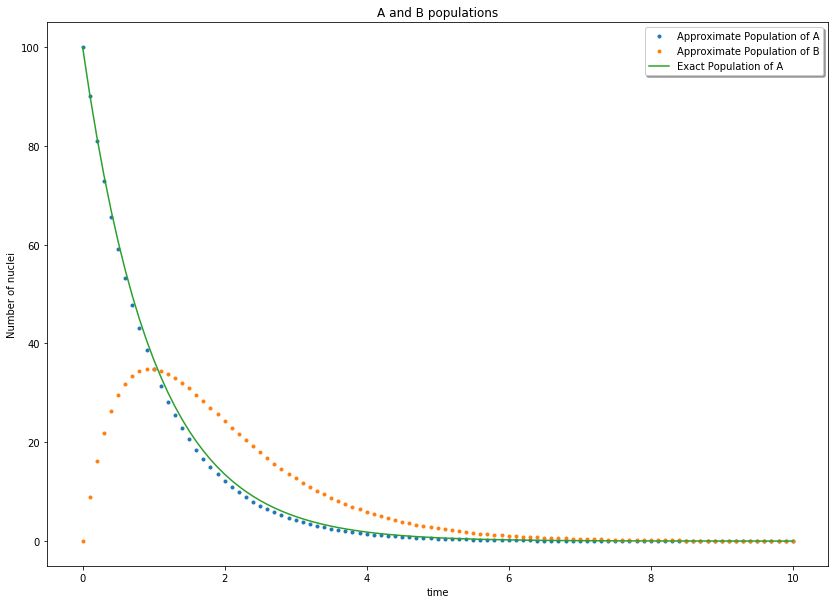

In [6]:

from math import exp
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

# variables: 

Range=100
lamdaA=1
lamdaB=1
initPopA=100
initPopB=0
tDelta=.1

#functions:

def NAanalytical(lamdaA, initPopA,t):
    '''Calculates the number of nuclei at a given time t of A type nuclei.
    The arguments are time and returns the value of N(number of nuclei)'''
    return initPopA*exp(-lamdaA*t)


def Napprox(lamdaA,lamdaB,initPopA,initPopB,tDelta ):
    '''Calculates the approximate number of nuclei type B using Eulers method at specific times. '''
    NA1=initPopA
    Aapprox=[initPopA]  #first calculate approximate values for type A  
    NB1=initPopB
    Bapprox=[initPopB]
    for x in range(Range): #now calculations for B can occur because we need A values
        NAnew= NA1-lamdaA*NA1*(tDelta)
        Aapprox.append(NAnew)
        NA1=NAnew
        NBnew= (lamdaA*NA1 - lamdaB*NB1)*tDelta + NB1
        Bapprox.append(NBnew)
        NB1=NBnew
        if NB1<0: #in case we get negative values. 
            Bapprox.append(0)
    return array(Aapprox, float), array(Bapprox,float)




def time(tDelta):
    """Creates a list of times consistent with the time values used in the Napprox function. 
    Argument is the delta t value."""
    t=0
    timelist=[0]
    for x in range(Range):
        t += tDelta
        timelist.append(t)
    return array(timelist,float)
     



# arrays for plotting    
NAexact=[] #makes array for exact population of type A nuclei
for x in t:
    N=NAanalytical(lamdaA,initPopA,x)
    NAexact.append(N)
    
    
t = time(tDelta)
Aapprox,Bapprox=Napprox(lamdaA,lamdaB,initPopA,initPopB,tDelta )



#plots with formatting
plt.figure(figsize=(14, 10))

plt.plot(t,Aapprox,".", label= "Approximate Population of A")
plt.plot(t,Bapprox, ".",label="Approximate Population of B")
plt.plot(t,NAexact,label="Exact Population of A")

plt.ylabel("Number of nuclei")
plt.xlabel("time")
plt.title("A and B populations")

legend = plt.legend(loc='upper right', shadow=True)
plt.show()

ADDED (more detailed description of plot):
    The above figure plots the approximated number of nuclei types A and B  over time where type A nuclei decay into type B nuclei. Type B is depicted in the orange data points, and Type A is depicted in blue data points. The approximated values were calculated using Euler's method. 
    

The above graph depicts the nuclear decay of A and B type nuclei. B type nuclei is dependent on the decay of A type because A type decays into B type. The following plots will explore how A type and B type decay interact with eachother. 

# Test Cases

Here  I explore the behavior found for various ratios of $N_{A0}/N_{B0}$ and $\lambda_A/\lambda_B$. 

N(0) for Type A is: 1.0
N(0) for Type B is: 1.0


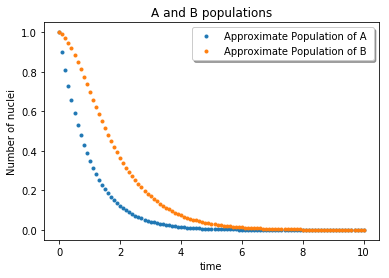

---------------------------------------------------------------------------------------------------------------------

N(0) for Type A is: 0.0
N(0) for Type B is: 1.0


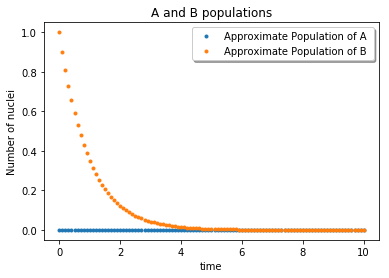

---------------------------------------------------------------------------------------------------------------------

N(0) for Type A is: 1.0
N(0) for Type B is: 0.0


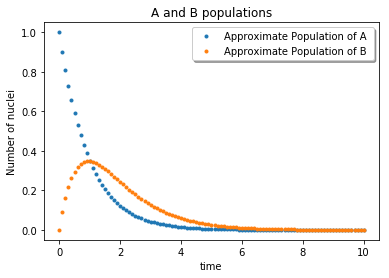

---------------------------------------------------------------------------------------------------------------------

lambda for Type A is: 1.0
lambda for Type B is: 1.0


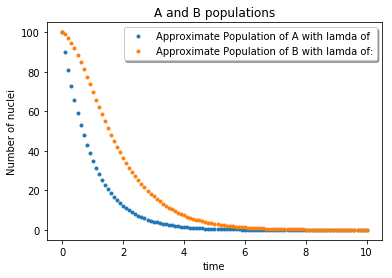

---------------------------------------------------------------------------------------------------------------------

lambda for Type A is: 0.1
lambda for Type B is: 1.0


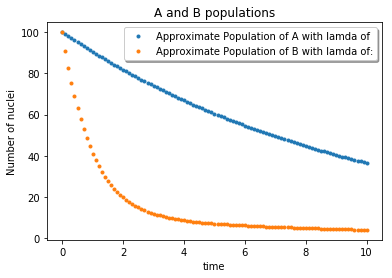

---------------------------------------------------------------------------------------------------------------------

lambda for Type A is: 1.0
lambda for Type B is: 0.1


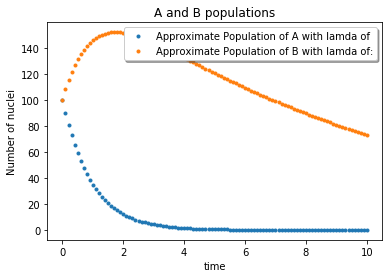

---------------------------------------------------------------------------------------------------------------------



In [52]:
#uses for loops to make plots for the test cases.  
from math import exp
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

# variables: 

Range=100
lamdaA=1
lamdaB=1
tDelta=.1

TestCaseInitPop=array([[1,1],[0,1],[1,0]],float)

for x in TestCaseInitPop:
    initPopA=x[0]
    initPopB=x[1]
    
    t = time(tDelta)
    Aapprox,Bapprox=Napprox(lamdaA,lamdaB,initPopA,initPopB,tDelta )
    
    print("N(0) for Type A is:",x[0])
    print("N(0) for Type B is:",x[1])
   # plt.figure(figsize=(14, 10))

    plt.plot(t,Aapprox,".", label= "Approximate Population of A")
    plt.plot(t,Bapprox, ".",label="Approximate Population of B ")

    plt.ylabel("Number of nuclei")
    plt.xlabel("time")
    plt.title("A and B populations")

    legend = plt.legend(loc='upper right', shadow=True)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------")
    print()


    
TestCaselamda=array([[1,1],[.10,1],[1,.10]],float)    
initPopA=100
initPopB=100
for x in TestCaselamda:
    lamdaA=x[0]
    lamdaB=x[1]
    
    t = time(tDelta)
    Aapprox,Bapprox=Napprox(lamdaA,lamdaB,initPopA,initPopB,tDelta )
    
    print("lambda for Type A is:",x[0])
    print("lambda for Type B is:",x[1])
  #  plt.figure(figsize=(14, 10))

    plt.plot(t,Aapprox,".", label= "Approximate Population of A with lamda of")
    plt.plot(t,Bapprox, ".",label="Approximate Population of B with lamda of:")

    plt.ylabel("Number of nuclei")
    plt.xlabel("time")
    plt.title("A and B populations")

    legend = plt.legend(loc='upper right', shadow=True)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------")
    print()


## Observations: 

ADDED (constant perameters): For the plots where ratios of $N_{A0}/N_{B0}$ were changed, lambda was set to 1 for both types of nuclei. 

### ratios of $N_{A0}/N_{B0}$

N(0) for Type A is: 100.0
N(0) for Type B is: 100.0
    * when the ratio of $N_{A0}:N_{B0}$ is 1:1, we observe that both types of nuclei decay, but type B decays at a slower rate. This is because the decay of A type nuclei gets converted to B type. Because B type has an influx of nuclei it decays slower. However eventually, fewer and fewer A type is covnerted to B type because there is less of A type over time so B type nuclei reaches normal decay rates. 


N(0) for Type A is: 0.0
N(0) for Type B is: 100.0
    * when the ratio of $N_{A0}:N_{B0}$ is 0:1 we see that type B nuclear decay has the same curve as the A type. This is because there is no A type nuclei feeding into the B type. therefore the B type will act like an independent species. 


N(0) for Type A is: 1.0
N(0) for Type B is: 0.0
    * when the ratio of $N_{A0}:N_{B0}$ is 1:0, A type nuclei acts the same as in the first graph because it is indepenent from the population of type B. However, this is not the case for type B. Because type B is dependent on Type A, as Type A decays, there is a small growth phase. The growthphase peaks and declines because eventually, there are more Type B nuclei decaying than there are type A nuclei supplementing type B growth. 

ADDED (what parameters were consant):
    For the plots where ratios of $\lambda_A/\lambda_B$ were changed, initial populations of type A and B was set to 100

### ratios of $\lambda_A/\lambda_B$. 

lambda for Type A is: 1.0
lambda for Type B is: 1.0
    * when the ratio of  $\lambda_A:\lambda_B$ is 1:1 type A and type B nuclei are decaying at the same rate. Because Type B is dependent on Type A, it has an overall slower rate of decay because it has an influx of type A being converted to type B at the beggining. 
    
    

lambda for Type A is: 0.1
lambda for Type B is: 1.0
    * when the ratio of  $\lambda_A:\lambda_B$ is 1:10, Type A is decaying at a much slower rate than type B. This means that Type A nuclei are bing converted to type B nuclei at a slower rate. Because of that we see that Type A has less of an affect on the population of type B. So much so that Type B nuclei almost exhibits the characteristics of Type A when lambda is 1.
    
    
    
lambda for Type A is: 1.0
lambda for Type B is: 0.1

    *when the ratio of  $\lambda_A:\lambda_B$ is 10:1, Type A nuclei is decaying at a much faster rate than type B. Therefore, there is a huge influx of A being converted to type B nuclei, causing there to be a growth phase. And because the decay rate for type B is small, it decays slower too. 

